## Name Spandan Das
# SIT725


# Discussion

* In the box-and-whisker plot, the box represents the interquartile range (IQR), with the horizontal line inside
indicating the median. The "whiskers" extend to the minimum and maximum values within 1.5 times the IQR.
Outliers, marked as individual points, lie beyond the whiskers.

* The green "x" on the plot represents the arithmetic mean of the daily price increases/decreases. This can give an
indication of the central tendency of the distribution.

* The presence of outliers in the daily price changes suggests extreme variations in BTC-to-USD values on those
days. Outliers might be indicative of significant market events, such as sudden large transactions, news releases,
or other factors impacting cryptocurrency prices. Identifying and understanding outliers is crucial for assessing
market volatility and potential risks.


In [12]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Load BTC-to-USD data from the CSV file
# Note: Replace 'data.csv' with the actual path to your CSV file
btc_data = np.genfromtxt('data.csv', delimiter=',')

# Extract Q3 2023 data (days 181-273)
q3_data = btc_data[181:273]

# Calculate aggregates for Q3 2023
mean_price = np.mean(q3_data)
min_price = np.min(q3_data)
q1_price = np.percentile(q3_data, 25)
median_price = np.median(q3_data)
q3_price = np.percentile(q3_data, 75)
max_price = np.max(q3_data)
std_dev_price = np.std(q3_data)
iqr_price = q3_price - q1_price

# Display aggregates
print(f"arithmetic mean: {mean_price:.2f}")
print(f"minimum: {min_price:.2f}")
print(f"Q1: {q1_price:.2f}")
print(f"median: {median_price:.2f}")
print(f"Q3: {q3_price:.2f}")
print(f"maximum: {max_price:.2f}")
print(f"standard deviation: {std_dev_price:.2f}")
print(f"IQR: {iqr_price:.2f}")

arithmetic mean: 28091.33
minimum: 25162.65
Q1: 26225.56
median: 28871.82
Q3: 29767.07
maximum: 31476.05
standard deviation: 1827.04
IQR: 3541.51


'\nIn the box-and-whisker plot, the box represents the interquartile range (IQR), with the horizontal line inside\nindicating the median. The "whiskers" extend to the minimum and maximum values within 1.5 times the IQR.\nOutliers, marked as individual points, lie beyond the whiskers.\n\nThe green "x" on the plot represents the arithmetic mean of the daily price increases/decreases. This can give an\nindication of the central tendency of the distribution.\n\nThe presence of outliers in the daily price changes suggests extreme variations in BTC-to-USD values on those\ndays. Outliers might be indicative of significant market events, such as sudden large transactions, news releases,\nor other factors impacting cryptocurrency prices. Identifying and understanding outliers is crucial for assessing\nmarket volatility and potential risks.\n'

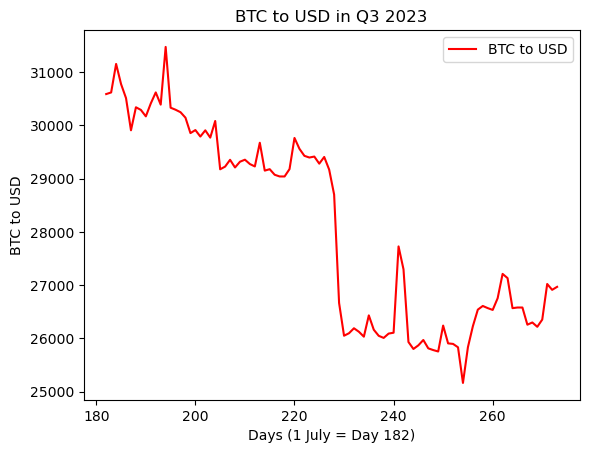

In [13]:
# Draw the Q3 2023 data plot
days = np.arange(182, 274)
plt.plot(days, q3_data, 'r-', label='BTC to USD')
plt.title('BTC to USD in Q3 2023')
plt.xlabel('Days (1 July = Day 182)')
plt.ylabel('BTC to USD')
plt.legend()
plt.show()

In [14]:
# Determine the day numbers with the lowest and highest observed prices in Q3 2023
lowest_price_day = np.argmin(q3_data) + 182
highest_price_day = np.argmax(q3_data) + 182

print(f"Lowest price was on day {lowest_price_day} ({min_price:.2f}).")
print(f"Highest price was on day {highest_price_day} ({max_price:.2f}).")


Lowest price was on day 254 (25162.65).
Highest price was on day 194 (31476.05).


### Box-and-Whisker Plot:

* The box-and-whisker plot visually represents the distribution of BTC-to-USD daily price increases/decreases in Q3 2023.
* The box itself represents the interquartile range (IQR), which spans from the first quartile (Q1) to the third quartile (Q3).
* The horizontal line inside the box denotes the median, which is the middle value of the dataset.
* The "whiskers" extend from the box to the minimum and maximum values within a certain range, typically 1.5 times the IQR.
* Individual points beyond the whiskers are considered outliers.

### Arithmetic Mean Marked with a Green "x":
* The green "x" on the plot represents the arithmetic mean of the daily price increases/decreases.
* The mean provides an indication of the central tendency of the distribution, giving an idea of where the average price change lies.
* It helps visualize how the mean relates to the spread and skewness of the data.

### Interpretation of Outliers:
* Outliers are data points that fall significantly outside the expected range of values.
* In the context of BTC-to-USD daily price changes, outliers might indicate unusual and extreme market events.
* Outliers could be caused by various factors such as major news events, large trades, regulatory changes, or other unforeseen circumstances affecting the cryptocurrency market.
* Identifying and understanding outliers is crucial for assessing market volatility and potential risks.
* Traders and analysts may pay special attention to days with outliers to gain insights into unusual market behavior and make informed decisions.

### Count of Outliers:
* The count of outliers, in this case, is determined using vectorized relational operators from numpy.
* It signifies the number of days in Q3 2023 with daily price changes that are significantly outside the expected range.
* The presence of 16 outliers suggests that there were 16 days during this period with unusually large or small daily price changes.

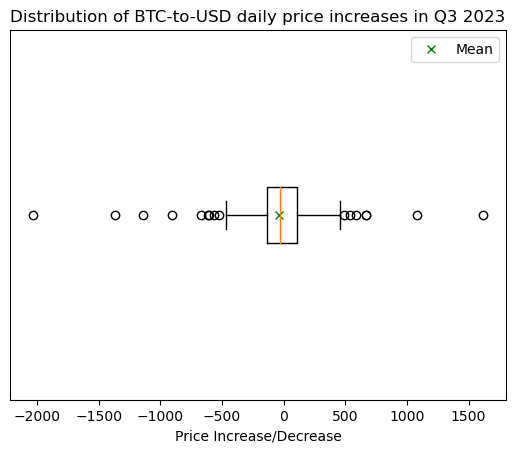

There are 16 outliers.


In [17]:
# Assuming 'q3_data' contains the Q3 2023 BTC-to-USD data
# If not, load or define it accordingly

# Calculate daily price increases/decreases
price_diff = np.diff(q3_data)

# Calculate mean and quartiles
mean_price_diff = np.mean(price_diff)
q1_price_diff = np.percentile(price_diff, 25)
q3_price_diff = np.percentile(price_diff, 75)
iqr_price_diff = q3_price_diff - q1_price_diff

# Calculate outlier threshold
lower_threshold = q1_price_diff - 1.5 * iqr_price_diff
upper_threshold = q3_price_diff + 1.5 * iqr_price_diff

# Identify outliers using vectorized relational operators
outliers = (price_diff < lower_threshold) | (price_diff > upper_threshold)

# Count the number of outliers
num_outliers = np.sum(outliers)

# Draw box-and-whisker plot
plt.boxplot(price_diff, vert=False)
plt.plot([mean_price_diff], [1], 'gx', label='Mean')
plt.title('Distribution of BTC-to-USD daily price increases in Q3 2023')
plt.xlabel('Price Increase/Decrease')
plt.yticks([])
plt.legend()
plt.show()

# Print the count of outliers
print(f"There are {num_outliers} outliers.")
